In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the data
market_data = pd.read_csv(r'F:\DATA SCIENCE\Kaggle Datasets\Marketing Analytics\marketing_data.csv')

#### About the columns

In [19]:
col_meaning = {'ID':'The ID of the customer',
'Year_Birth' :'Year of birth of the customer',
'Education' :'Education level of the customer',
'Marital_Status' :'Marital status of the customer',
'Income': "customer's yearly household income",
'Kidhome' :"number of small children in the customer's househlod",
'Teenhome' : "number of teenagers in the customer's household",
'Dt_Customer' :"date of customer's enrollment with the company",
'Recency': 'number of days since the last purchase',
'MntWines' : 'amount spent on wines in last 2 years',
'MntFruits' : 'amount spent on fruits in last 2 years',
'MntMeatProducts': 'amount spent on meat products in last 2 years',
'MntFishProducts':'amount spent on fish products in last 2 years',
'MntSweetProduct' :'amount spent on sweet products in last 2 years',
'MntGoldProds': 'amount spent on gold products in last 2 years',
'NumDealsPurchases':'number of purchases made with discount',
'NumWebPurchases':"number of purchasesmade through company's website",
'NumCatalogPurchases' :'number of purchases made using catalogue',
'NumStorePurchases' :'number of purchases made directly in stores',
'NumWebVisitsMonth' :"number of visits to company's website in last month",
'AcceptedCmp3': '1 if the customer accepted the offer in the 3rd campaign, 0 otherwise',
'AcceptedCmp4' : '1 if the customer accepted the offer in the 4th campaign, 0 otherwise',
'AcceptedCmp5' : '1 if the customer accepted the offer in the 5th campaign, 0 otherwise',
'AcceptedCmp1' :'1 if the customer accepted the offer in the 1st campaign, 0 otherwise',
'AcceptedCmp2':'1 if the customer accepted the offer in the 2nd campaign, 0 otherwise',
'Response(target)' :'1 if the customer accepted the offer in the last campaign, 0 otherwise',
'Complain':'1 if the customer complained in the last 2 years',
'Country': 'country where customer is situated'}

In [3]:
market_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


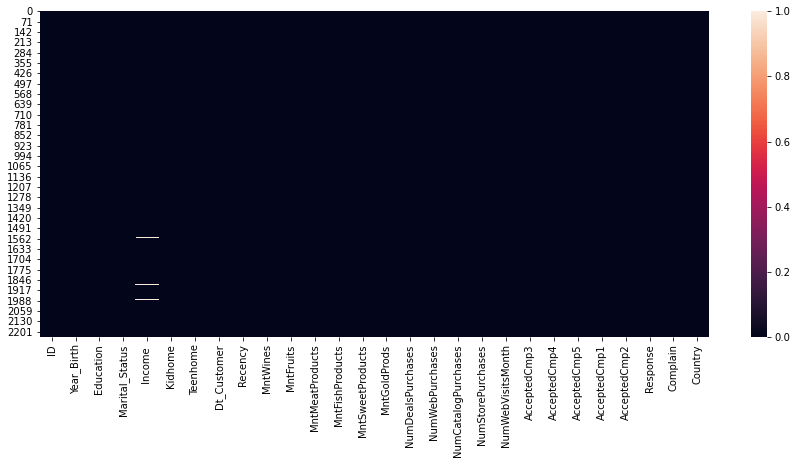

In [4]:
# checking missing values 
print(market_data.isna().sum())
plt.figure(figsize = (15,6))
sns.heatmap(market_data.isnull())
plt.show()

 Income is the only column that have missing values

##### **Cleaning the data alittle bit**

The column ' Income ' has blank spaces on both sides that we should remove


In [4]:
market_data.rename(columns = {' Income ':'Income'}, inplace = True)

Creating a function to remove the '$' sign from the Income and converting the dtype from 'object' to 'float'

In [5]:
def converter(x):
    try: 
        return float(x.split('$')[1].replace(',',''))
    except AttributeError: # as there are some missing values 
        return np.NaN
    
market_data['Income'] =  market_data['Income'].apply(converter)   

Converting the dtype from 'object' to 'datetime64' so that we can create new columns for month and year of enrollment of the customers

In [6]:
market_data['Dt_Customer'] = pd.to_datetime(market_data.Dt_Customer)
market_data['DT_month'] = market_data.Dt_Customer.dt.month
market_data['DT_year'] = market_data.Dt_Customer.dt.year

In the Education column <br>
Basic - who passed school education <br>
Graduation - who has completed a course for degree or diploma <br>
2n Cycle - ? <br>
Master - who obtain Master degree <br>
PhD - who obtain PhD <br>
So, after few searches I got some info from the guy who uploaded this data on kaggle and according to him Master and 2n Cycle are kind of same so we are going to replace these names.

In [7]:
print('Before:',market_data.Education.unique())
market_data.Education.replace({'2n Cycle':'Master'},inplace = True)
print('After:',market_data.Education.unique())

Before: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
After: ['Graduation' 'PhD' 'Master' 'Basic']


In [9]:
market_data.Education.value_counts()

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

In Marital status I think 'Alone' is similar to 'Single',<br>
'YOLO'(you only live once)🙄 is kinda sound like they are single and want to enjoy their life to the fullest I guess🤔, So I am replacing these clases by the class 'Single'.<br>
And I didn't get what the 'Absurd' class refers to so I am also adding this to the class 'Single'.

In [8]:
print(market_data.Marital_Status.unique())
market_data.Marital_Status.replace({'Alone':'Single','YOLO':'Single','Absurd':'Single'}, inplace = True)
print(market_data.Marital_Status.unique())

['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
['Divorced' 'Single' 'Married' 'Together' 'Widow']


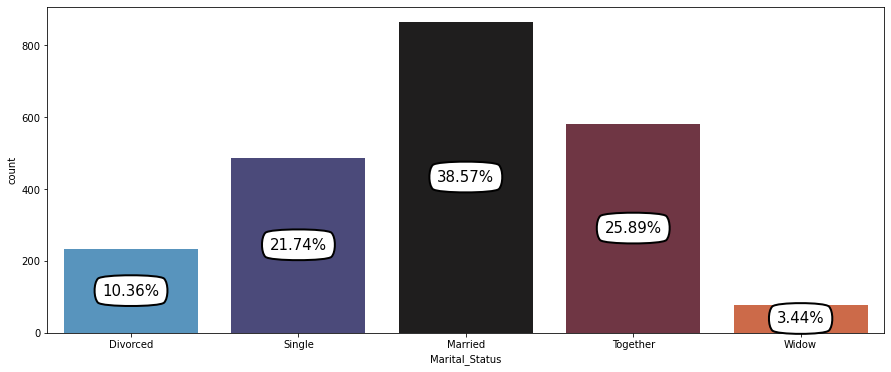

In [64]:
plt.figure(figsize = (15,6))
plots = sns.countplot(x = 'Marital_Status',data = market_data,palette='icefire')
total = market_data.Marital_Status.count()

for bar in plots.patches:
    _ = plots.annotate(format((bar.get_height()/total)*100, '.2f')+'%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')

1) Most customers of company are married about 38.57%, followed by people in livings and singles.

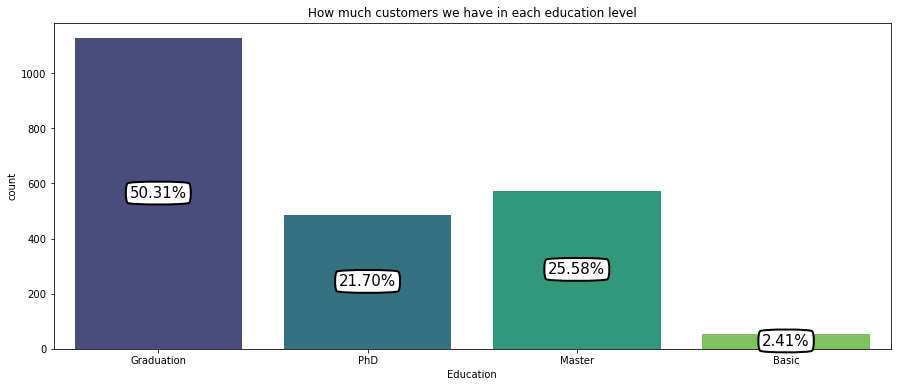

In [32]:
plt.figure(figsize = (15,6))
plots = sns.countplot(x = 'Education',data = market_data,palette='viridis')
plt.title('How much customers we have in each education level')
total = market_data.Education.count()
for bar in plots.patches:
    _ = plots.annotate(format((bar.get_height()/total)*100, '.2f')+"%", 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.3", fc="w", ec="black", lw=2),
                   textcoords='offset points')

1) More than half of our customers are degree or diploma holders followed by Masters and PhD. <br>
2) We have very few customers that have completed just their schooling. <br>

In [33]:
market_data.groupby(by = ['Education'], as_index = False, sort = False)['Income'].agg(['mean','median','std']).rename(columns = {'mean':'Mean_income','median':'Median_income','std':'std_of_income'}).reset_index()

,Education,Mean_income,Median_income,std_of_income
0,Graduation,52720.373656,52028.5,28177.192681
1,PhD,56145.313929,55212.0,20612.979997
2,Master,51046.969912,49605.0,21006.410554
3,Basic,20306.259259,20744.0,6235.066773


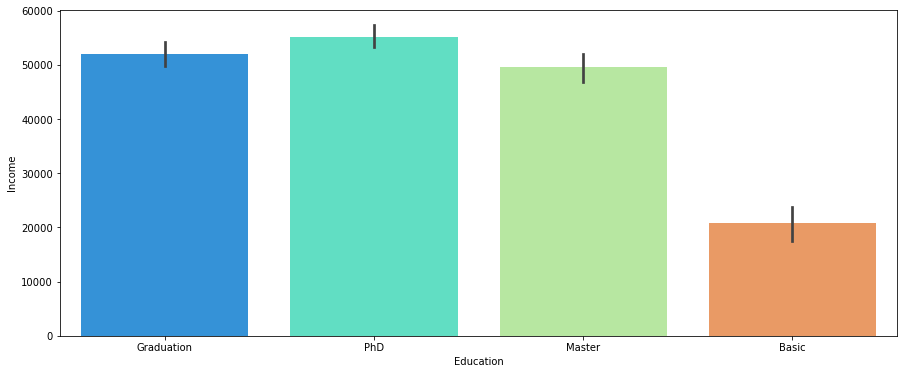

In [37]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'Education',y = 'Income', data = market_data, 
            estimator = np.median,palette = 'rainbow')
plt.show()

1) Here we can see that in general PhD holders are earning more money than people with Basic education, which make sence as PhD is the heighest education level among all education classes present here. <br>
2) But for some reason degree or diploma holders(Graduation) have higher income compare to masters. <br>

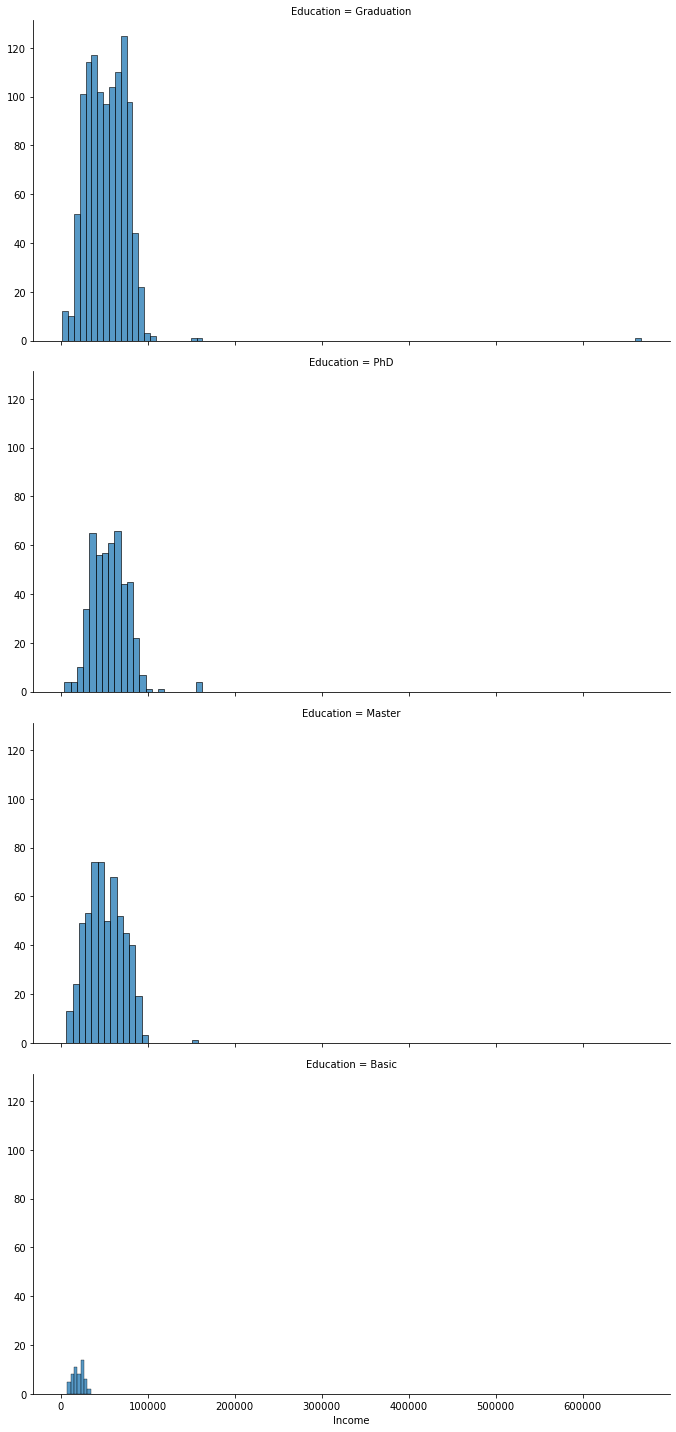

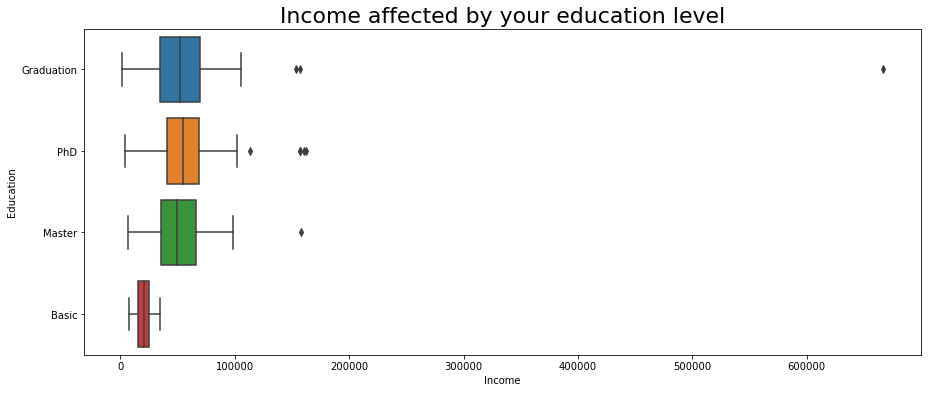

In [166]:
g1 = sns.FacetGrid(data = market_data,row = 'Education',height=5,
    aspect=1.9)
g2 = g1.map(sns.histplot,'Income')
plt.show()
plt.figure(figsize = (15,6))
sns.boxplot(x = 'Income',y = 'Education', data = market_data).set_title(
'Income affected by your education level',fontsize = 22)
plt.show()

1) These plots shows that we have few outliers in Income column mostly from Graduation and PhD. <br>
2) We can also see that the distribution plot of income for graduation is bimodal and have the heighest frequency where Basic has the lowest and it's median also lies much below than the other three classes(i.e. Graduation,PhD, and Master)<br>

##### Removing outliers from Income column

In [9]:
# Let's remove that one outlier
Q1 = market_data.Income.quantile(q = 0.25)
Q3 = market_data.Income.quantile(q = 0.75)
IQR = Q3 - Q1
floor = Q1 - 1.5*IQR
celing = Q3 + 1.5*IQR
mar_data = market_data[(market_data.Income >= floor)
            & (market_data.Income <= celing)]
print('No. of datapoints dropped:',(market_data.shape[0] - mar_data.shape[0]))

No. of datapoints dropped: 32


In [10]:
# performing the same preprocessing on mar_data 
mar_data.Education.replace({'2n Cycle':'Master'},inplace = True)
mar_data.Marital_Status.replace({'Alone':'Single','YOLO':'Single','Absurd':'Single'},inplace = True)

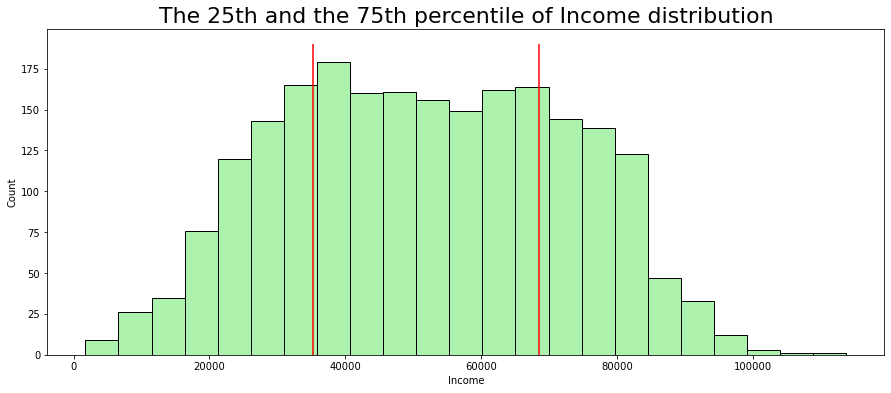

In [168]:
plt.figure(figsize = (15,6))
sns.histplot(x = 'Income',data = mar_data,color = 'lightgreen')
plt.vlines(x = Q1,ymin = 0,ymax = 190,color = 'red')
plt.vlines(x = Q3,ymin = 0,ymax = 190,color = 'red')
plt.title('The 25th and the 75th percentile of Income distribution', fontsize = 22)
plt.show()

In [11]:
min_ = min(mar_data.Income)
max_= max(mar_data.Income)
mar_data['Income_segment'] = pd.cut(mar_data.Income,bins = [min_,Q1,Q3,max_], labels = ['Low','Medium','High'])
mar_data.Income_segment.value_counts()

Medium    1108
Low        553
High       546
Name: Income_segment, dtype: int64

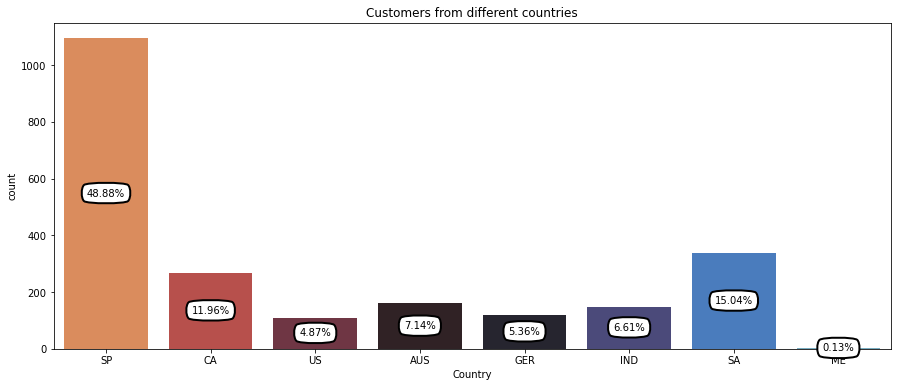

In [67]:
plt.figure(figsize = (15,6))
plots = sns.countplot(x = 'Country',data = market_data,palette='icefire_r')
total = market_data.Country.count()
plt.title('Customers from different countries')
for bar in plots.patches:
    _ = plots.annotate(format((bar.get_height()/total)*100, '.2f')+'%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=10, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')

1) Almost half of the customers are from Spain( may be the company is a spanish comapny ) followed by South Africa and Canada. 

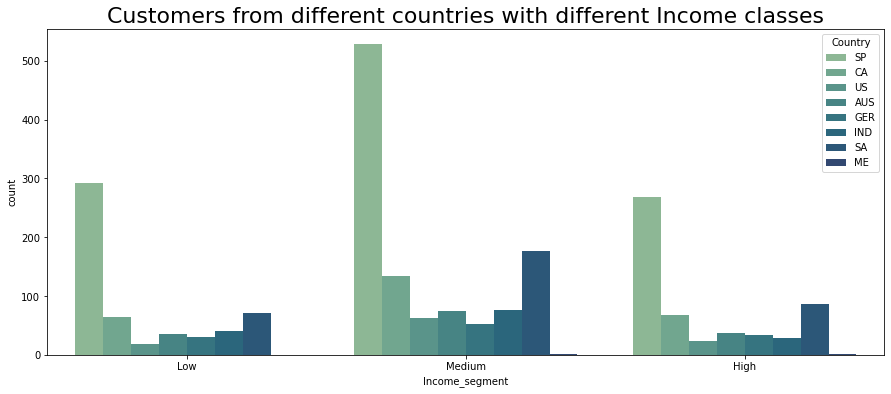

    Percentage of people in different income classes from each country:


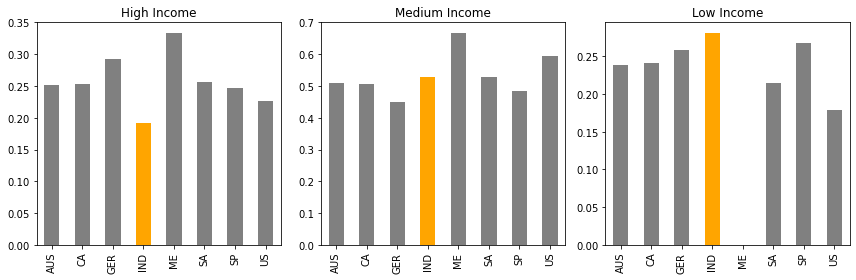

In [188]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'Income_segment', hue = 'Country',data = mar_data,palette='crest')
plt.title('Customers from different countries with different Income classes',fontsize = 22)
plt.show()
col = mar_data.Income_segment.unique().tolist()[:-1]
color_ = list(np.full(8,'gray'))
color_[3] = 'orange'
plt.figure(figsize = (12,4))
print('    Percentage of people in different income classes from each country:')
for j,i in enumerate(col):
    ax = plt.subplot(1,3,j+1)
    rich = mar_data[mar_data.Income_segment == i]
    (rich.Country.value_counts() / mar_data.Country.value_counts()).plot.bar(
     color = color_,ax = ax)
    plt.title(i+' Income')
    plt.tight_layout()

1) Most of the buyers from all the different countries belongs to Medium Income class followed by high Income class.<br>

2) From the above plots we can see that out of all the Indians that buy products from this company around 20% belongs to High Income class, which is the lowest percentage among all the other countries in that class, more than 50% indians belongs to Middle Income class, and around 30% in the Lower Income class. <br>



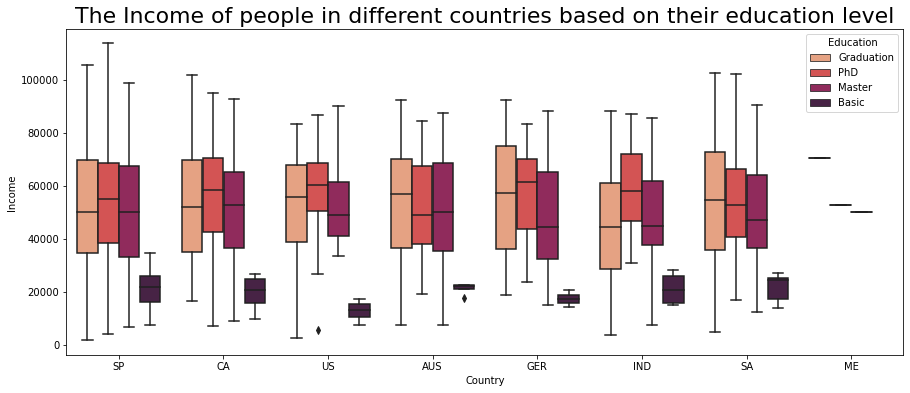

In [178]:
plt.figure(figsize = (15,6))
sns.boxplot(x = 'Country',y = 'Income',
            hue = 'Education',palette = 'rocket_r', data = mar_data)
plt.title('The Income of people in different countries based on their education level',fontsize = 22)
plt.show()

1) It is very clear that people with just basic education are earning much less compare to any other classes in all the different countries. <br>
2) In India people with PhD are earning way more than the Graduates compare to other countries.

  Percentage of people in different income classes from each education class:


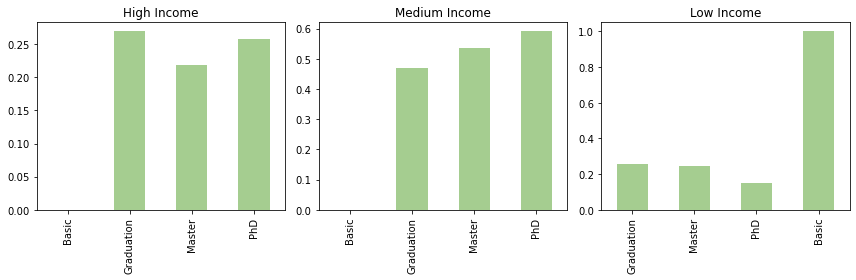

In [192]:
col = mar_data.Income_segment.unique().tolist()[:-1]
plt.figure(figsize = (12,4))
print('  Percentage of people in different income classes from each education class:')
for j,i in enumerate(col):
    ax = plt.subplot(1,3,j+1)
    rich = mar_data[mar_data.Income_segment == i]
    (rich.Education.value_counts() / mar_data.Education.value_counts()).plot.bar(
     colormap = 'crest',ax = ax)
    plt.title(i+" Income")
    plt.tight_layout()

1) All the people having only basic education are belongs to Low Income class. <br>
<br>
2) Percentage of graduates,from the total graduates in the dataset, are slightly more in High Income class compare to PhD holders but in general PhD holders are earning more compare to others as around 83% of the PhD holders, from the total PhD holders in the dataset, are in the Medium or High Income class. <br>

  Percentage of people in different income classes from each marital status:


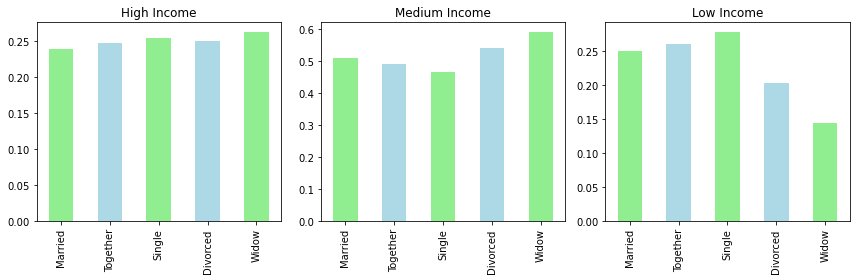

In [212]:
col = mar_data.Income_segment.unique().tolist()[:-1]
plt.figure(figsize = (12,4))
print('  Percentage of people in different income classes from each marital status:')
for j,i in enumerate(col):
    ax = plt.subplot(1,3,j+1)
    rich = mar_data[mar_data.Income_segment == i]
    (rich.Marital_Status.value_counts() / mar_data.Marital_Status.value_counts()).plot.bar(
     color = ['lightgreen','lightblue'],ax = ax)
    plt.title(i+" Income")
    plt.tight_layout()

1) In general widows are earning more compare to others as around 85% of the widows, from the total widows in the dataset, are in the Medium or High Income class.(but why 🤔)

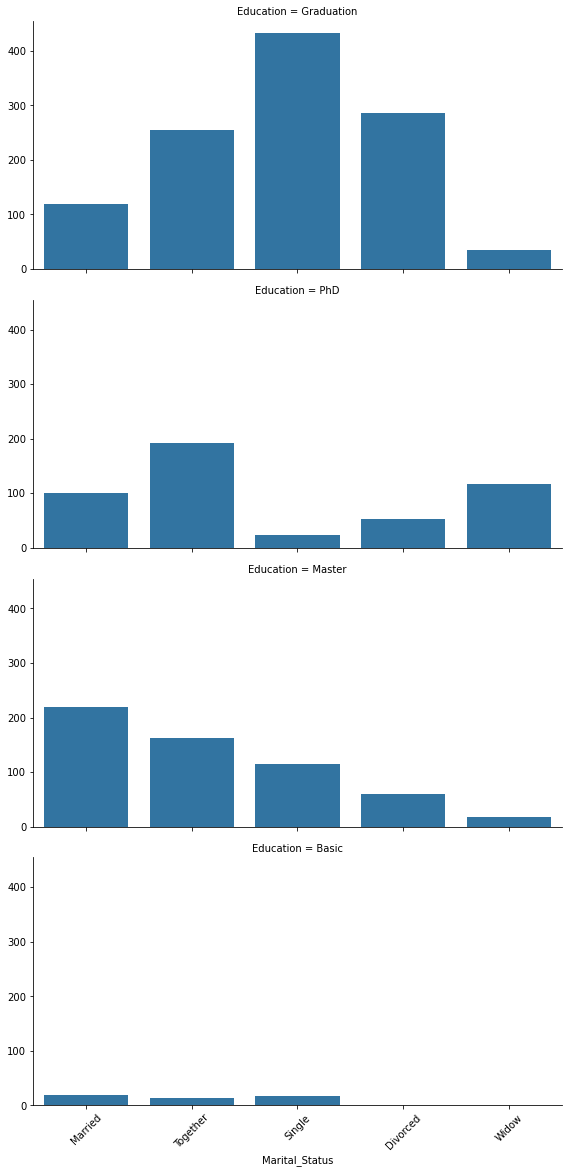

In [184]:
s1 = sns.FacetGrid(data = market_data,row = 'Education',height=4,
    aspect=2)
s2 = s1.map(sns.countplot,'Marital_Status')
plt.xticks(rotation = 45)
plt.show()

1) More married peoples have Masters, more singles are graduates, and more phd holders are in living. <br>
2) Most widows are phd holders, and we know in general phd holders are earning more, so it explains that widows, in our dataset, are earning more.<br>

In [12]:
# creating a new feature of customer's age
mar_data['Age'] = [2014 - int(i) for i in mar_data.Year_Birth]

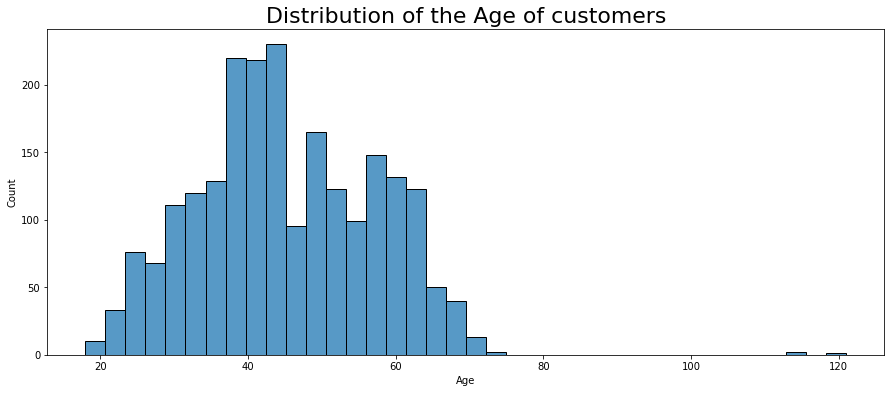

In [234]:
plt.figure(figsize = (15,6))
sns.histplot(x = 'Age', data = mar_data, element="bars")
plt.title('Distribution of the Age of customers', fontsize = 22)
plt.show()

Ok there are few outliers that we have to take care of.

No. of datapoints dropped: 3


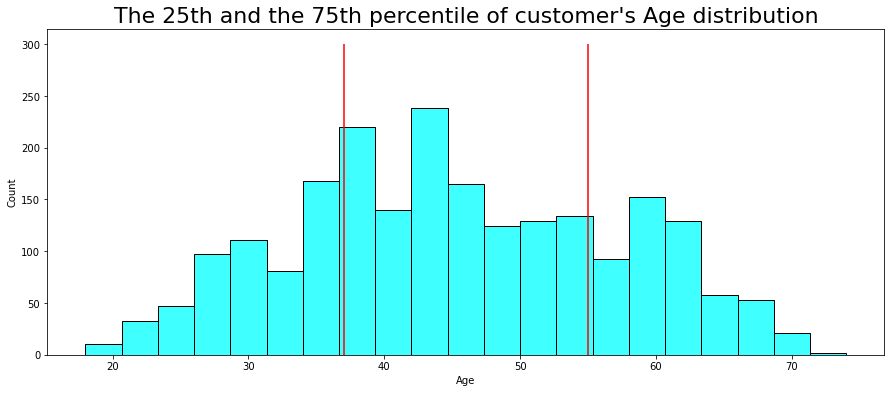

In [14]:
# Let's remove that one outlier
Q1 = mar_data.Age.quantile(q = 0.25)
Q3 = mar_data.Age.quantile(q = 0.75)
IQR = Q3 - Q1
floor = Q1 - 1.5*IQR
celing = Q3 + 1.5*IQR
mar_data1 = mar_data[(mar_data.Age >= floor)
            & (mar_data.Age <= celing)]
print('No. of datapoints dropped:',(mar_data.shape[0] - mar_data1.shape[0]))
plt.figure(figsize = (15,6))
sns.histplot(x = 'Age', data = mar_data1, element="bars", color = 'cyan')
plt.title("The 25th and the 75th percentile of customer's Age distribution", fontsize = 22)
plt.vlines(x = Q1,ymin = 0,ymax = 300,color = 'red')
plt.vlines(x = Q3,ymin = 0,ymax = 300,color = 'red')
plt.show()

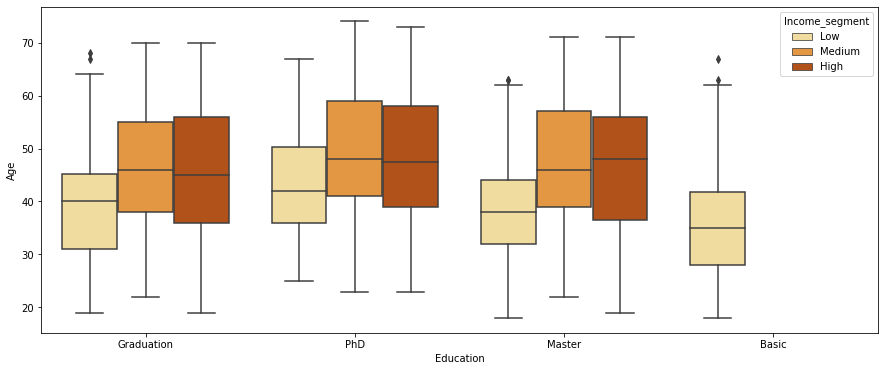

In [245]:
plt.figure(figsize = (15,6))
sns.boxplot(x = 'Education',y = 'Age',hue = 'Income_segment' ,data = mar_data1, palette = 'YlOrBr')
plt.show()

1) In general PhD holders are of higher age, explains why most widows are in this class, followed by masters, which explain why most married people are in this class, and people with basic educations are generaly younger people, which explains why there are no widows or divorced people are in this group.<br>
<br>
2) We can notice that people in Low Income class are generaly younger compare to other income classes.<br>
<br>
3) We can also notice a people with High Income are slight younger than the people with Medium Income in case of PhD holders and Masters.

In [15]:
# creating a new column of total child in home
mar_data1['Total_child'] = mar_data1.Teenhome + mar_data1.Kidhome

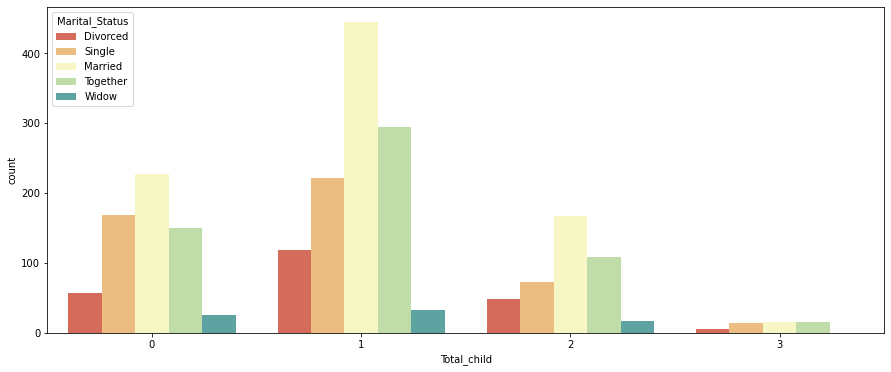

                           Percentage of people having total no. of child from each marital status:


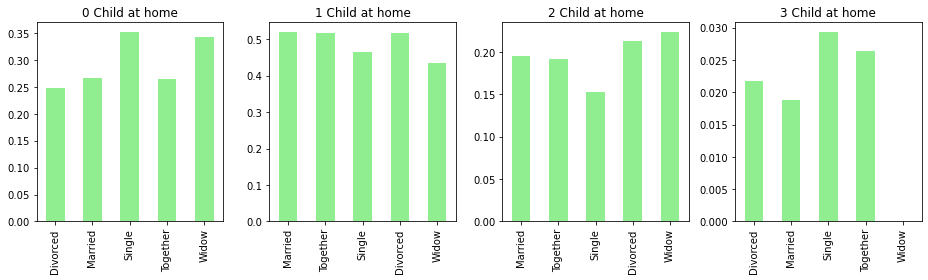

In [187]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'Total_child', hue = 'Marital_Status',
              data = mar_data1,palette = 'Spectral')
plt.show()

col = mar_data1.Total_child.unique().tolist()[:]
plt.figure(figsize = (13,4))
print('                           Percentage of people having total no. of child from each marital status:')
for j,i in enumerate(col):
    ax = plt.subplot(1,4,j+1)
    dj = mar_data1[mar_data1.Total_child == i]
    (dj.Marital_Status.value_counts() / mar_data1.Marital_Status.value_counts()).plot.bar(
        ax = ax, color = 'lightgreen')
    plt.title(str(i)+" Child at home")
    plt.tight_layout()

1) It shows that most of the people have only 1 child at their home followed by 0 (i.e. no child) and 2 children. <br>
2) percentage of widows and singles, from total number of widows and single present in the dataset respectively, are higher in the 0 chlid class compare to others, and no widows, present in our dataset, have more than 2 children .<br>
3) And btw why single people have child at home?🤔(may be it's not their child I guess)🤨

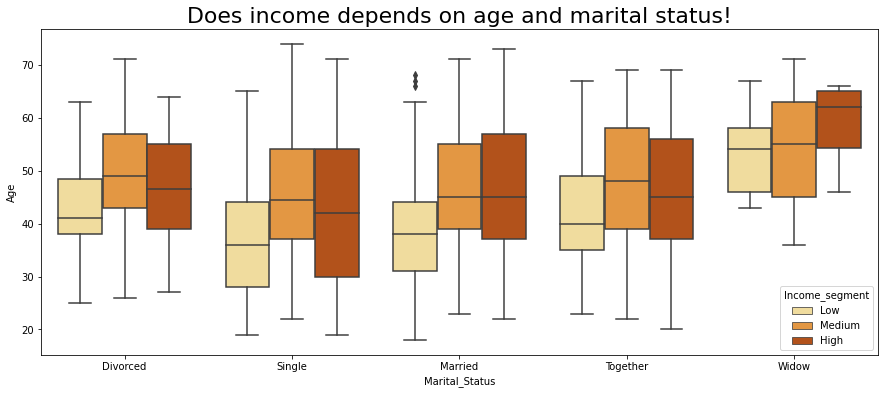

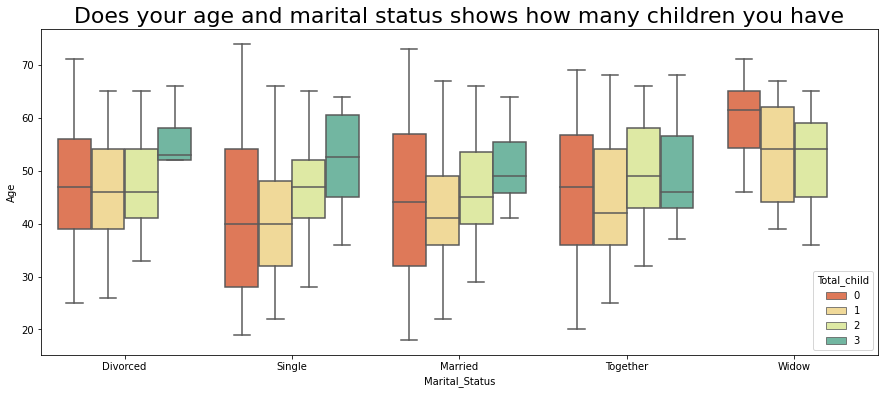

In [281]:
plt.figure(figsize = (15,6))
sns.boxplot(x = 'Marital_Status',y = 'Age',hue = 'Income_segment' ,data = mar_data1, palette = 'YlOrBr')
plt.title("Does income depends on age and marital status!",fontsize = 22)
plt.show()
plt.figure(figsize = (15,6))
sns.boxplot(x = 'Marital_Status',y = 'Age',hue = 'Total_child' ,data = mar_data1, palette = 'Spectral')
plt.title("Does your age and marital status shows how many children you have",fontsize = 22)
plt.show()

1) In general widows and divorcees are of higher age group compare to others, and singles are generally of lower age group.<br>
2) We can also notice that widows have very small spread and generaly of age greater than 45 or 50. <br>
3) People with Lower Income in all the marital status are generaly of younger age compare to others in that same marital status.<br>
4) Also in case of married people and widows as the age is increasing so is their income. <br>
5) Generaly in all the different marital status people having 1 or no child at home are of lower age group compare to others in that same marital status and the number of children keeps increasing as their age is increasing but that is not the case for the widows.<br>
6) In case of widows higher age group have no children at their home which makes sence as they are old people and their children must have grown older, which is also applied to older married people as well.<br>

In [24]:
print ('Recency:',col_meaning['Recency'])
# creating a new column 
q1 = mar_data.Recency.quantile(q = .25)
q3 = mar_data.Recency.quantile(q = .75)
max_ = max(mar_data.Recency)

print('Q1:{:.3f}, Q3:{:.3f}'.format(q1,q3))
print('Max:',max_)

# Let's create a 3 gruops uptoQ1:small, Q2-Q3:medium, Q3-end:large
mar_data1['recency_grp'] = pd.cut(mar_data1.Recency, bins = [-1,q1,q3,max_],
                                labels = ['small','medium','large'])

Recency: number of days since the last purchase
Q1:24.000, Q3:74.000
Max: 99


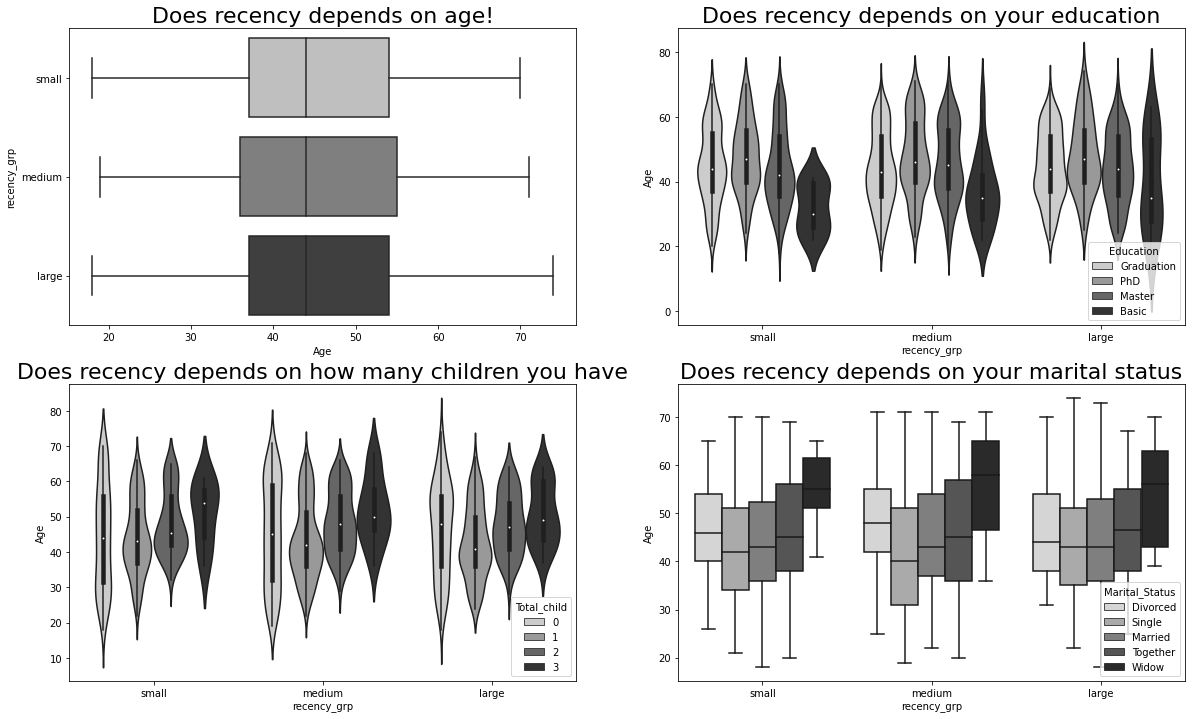

In [56]:
plt.figure(figsize = (20,12))
plt.subplot(221)
sns.boxplot(y = 'recency_grp',x = 'Age' ,data = mar_data1, palette = 'binary')
plt.title("Does recency depends on age!",fontsize = 22)
plt.subplot(222)
sns.violinplot(x = 'recency_grp',y = 'Age', hue = 'Education' ,data = mar_data1, palette = 'binary')
plt.title("Does recency depends on your education",fontsize = 22)
plt.subplot(223)
sns.violinplot(x = 'recency_grp',y = 'Age',hue = 'Total_child' ,data = mar_data1, palette = 'binary')
plt.title("Does recency depends on how many children you have",fontsize = 22)
plt.subplot(224)
sns.boxplot(x = 'recency_grp',y = 'Age',hue = 'Marital_Status' ,data = mar_data1, palette = 'binary')
plt.title("Does recency depends on your marital status",fontsize = 22)
plt.show()

1) Well it doesn't seem like recency depends on any of these parameters that much.

In [61]:
col_meaning['Dt_Customer']

"date of customer's enrollment with the company"

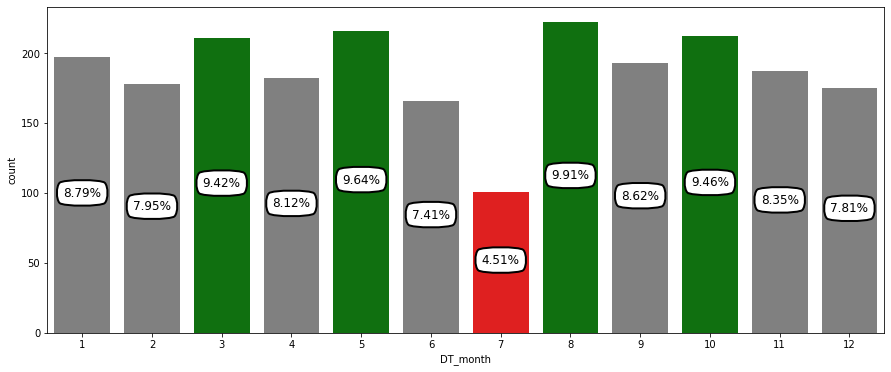

In [54]:
plt.figure(figsize = (15,6))
p = list(np.full(12,'grey'))
p[2],p[4],p[7],p[9] = 'green','green','green','green'
p[6] = 'red'
plots = sns.countplot(x = 'DT_month', data = market_data, palette= p)
total = market_data.DT_month.count()
for bar in plots.patches:
    _ = plots.annotate(format((bar.get_height()/total)*100, '.2f')+'%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=12, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')

1) It seems like company is unable to acquire more customers in the month of july.

In [102]:
cp = market_data.groupby(by = 'Country')[['MntWines','MntFruits',
       'MntMeatProducts','MntFishProducts','MntSweetProducts',
       'MntGoldProds']].sum()
cp['Sum'] = cp.MntWines	+ cp.MntFruits + cp.MntMeatProducts + cp.MntFishProducts + cp.MntSweetProducts + cp.MntGoldProds
sumation = cp.pop('Sum')
cp1 = round(cp.div(sumation, axis = 0),3)
cp1

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Country,,,,,,
AUS,0.494,0.043,0.257,0.065,0.051,0.089
CA,0.502,0.046,0.274,0.060,0.046,0.073
GER,0.500,0.041,0.279,0.064,0.038,0.078
IND,0.456,0.048,0.319,0.061,0.041,0.076
ME,0.554,0.003,0.262,0.072,0.039,0.070
SA,0.502,0.042,0.277,0.065,0.043,0.072
SP,0.510,0.043,0.270,0.061,0.046,0.070
US,0.477,0.045,0.298,0.065,0.043,0.072


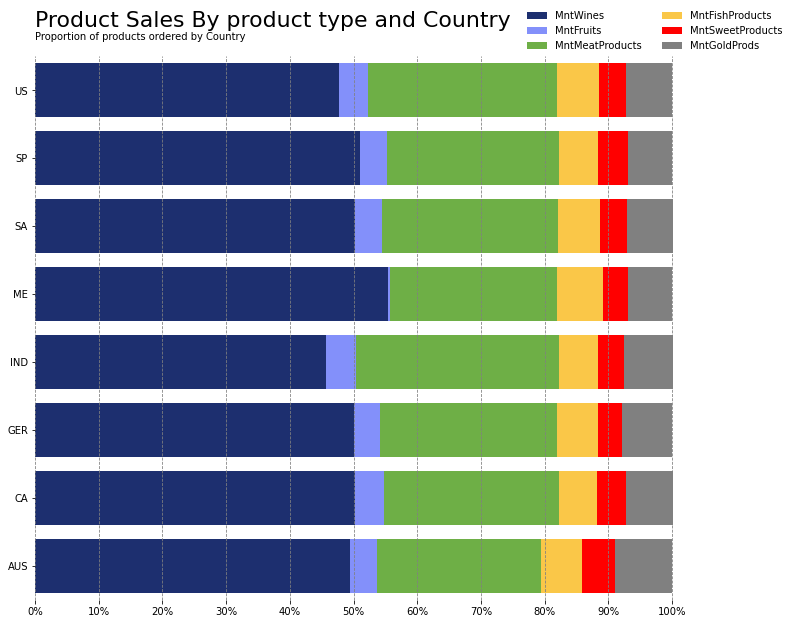

In [121]:
# variables
labels = ['MntWines','MntFruits',
       'MntMeatProducts','MntFishProducts','MntSweetProducts',
       'MntGoldProds']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748','red','gray']
title = 'Product Sales By product type and Country\n'
subtitle = 'Proportion of products ordered by Country'
def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
# figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left',fontsize = 22)
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.48, 1.0, 0.65, 0.1]), ncol=2, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
    
plot_stackedbar_p(cp1, labels, colors, title, subtitle)

1) The best selling product of the company is wine as almost 50% order from all the different countries are wine, followed by meat products (25%-30%).<br>
2) Montenegro people prefer fish products a little more compare to other countries, and doesn't order fruit products that much.<br>
3) Considering preference for meat products Indians order more, out of all the different products ordered by Indians excluding wine, and for gold products Australians order more, out of all the different products ordered by Australians excluding wine of course.<br>

In [122]:
dz = pd.pivot_table(data = market_data, values = ['MntWines','MntFruits',
       'MntMeatProducts','MntFishProducts','MntSweetProducts',
       'MntGoldProds'], index = 'Education',aggfunc='mean')
dz = dz.reset_index()
dz

,Education,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
0,Basic,17.055556,11.111111,22.833333,11.444444,12.111111,7.240741
1,Graduation,43.149956,30.774623,50.849157,179.488909,31.367347,284.268855
2,Master,37.549738,24.240838,42.523560,155.541012,25.808028,285.286213
3,PhD,26.728395,20.049383,32.310700,168.602881,20.222222,404.495885


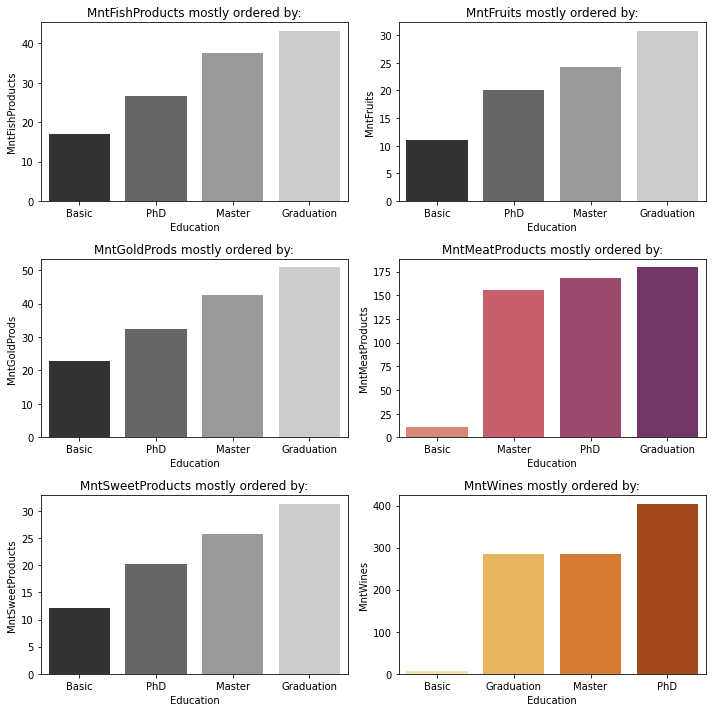

In [211]:
plt.figure(figsize = (10,10))
col = dz.columns[1:]
p = {0:'gray',1:'gray',2:'gray',3:'flare',4:'gray',5:'YlOrBr'}
for i,product in enumerate(col):
    ax = plt.subplot(3,2,i+1)
    sns.barplot(x = 'Education',y = product,
                        order = dz.sort_values(product).Education,
                        data = dz,palette=p[i],ax = ax)
    plt.title(product+' mostly ordered by:')
    plt.tight_layout()

1) People with basic education are not ordering wine that much, as they are younger in age, and Phd holders are ordering the most amount of wine, as most of them are older in age.

In [128]:
mar_data1['age_grp'] = pd.cut(mar_data1.Age,bins = [18,30,40,50,60,75],
                              labels = ['18-30','30-40','40-50','50-60','60-75'])
mar_data1.age_grp.value_counts()

40-50    639
30-40    579
50-60    467
60-75    263
18-30    255
Name: age_grp, dtype: int64

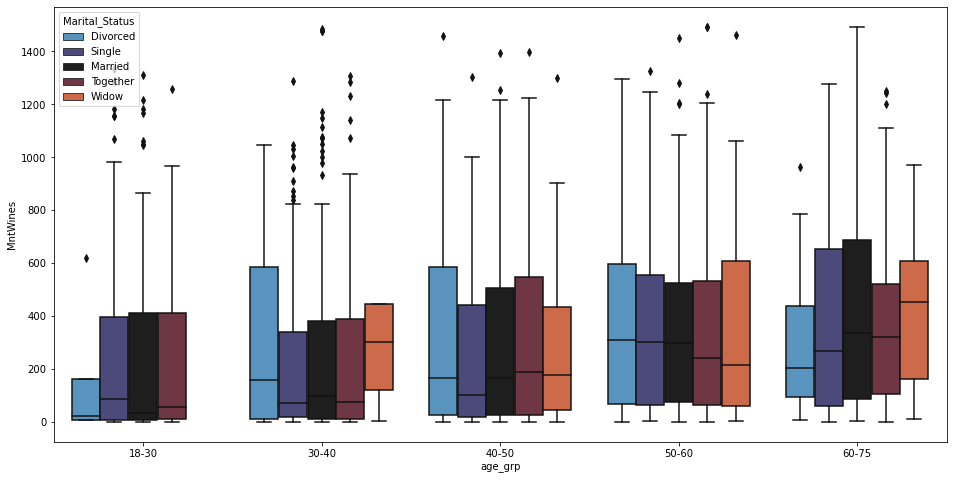

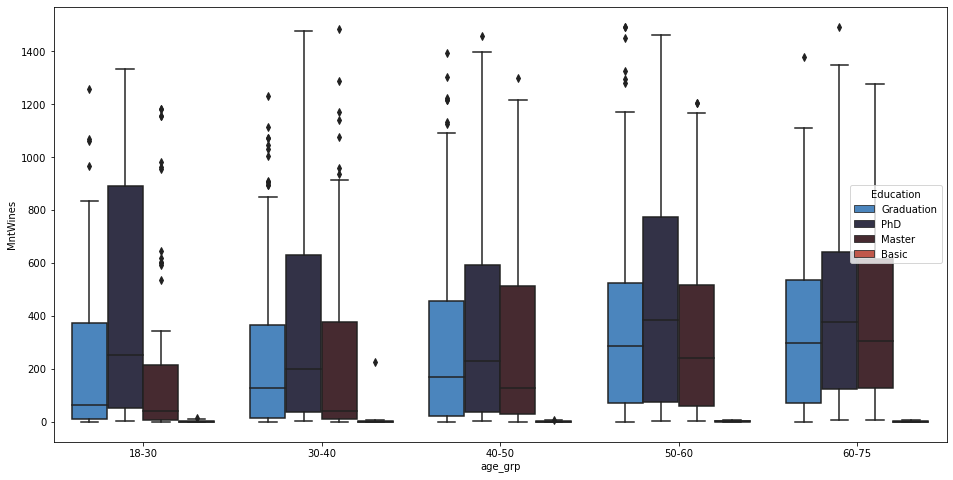

In [137]:
plt.figure(figsize = (16,8))
sns.boxplot(y = 'MntWines',x = 'age_grp', hue = 'Marital_Status', palette = 'icefire',data = mar_data1)
plt.show()
plt.figure(figsize = (16,8))
sns.boxplot(y = 'MntWines',x = 'age_grp', hue = 'Education', palette = 'icefire',data = mar_data1)
plt.show()

1) We can see that as the age incrases the orders of wine also increases.<br>
2) We can also see so many singles at the age group of 60-75 as well(may be they never got married).<br>
3) Phd holders are realy drinking a lot of wine even the younger ones of age group 18-30.

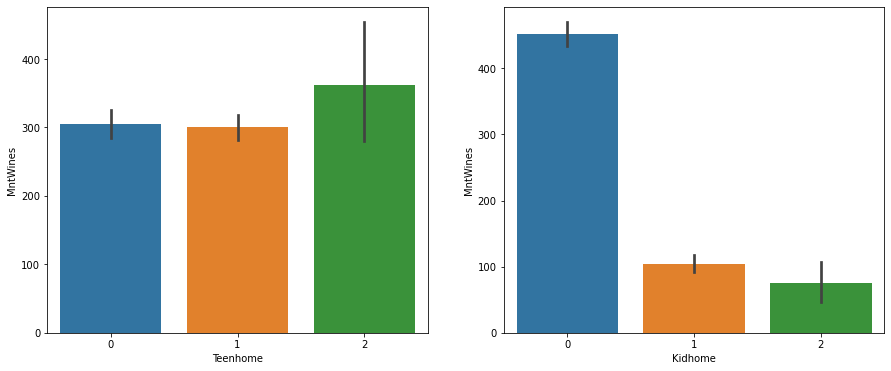

In [276]:
plt.figure(figsize = (15,6))
plt.subplot(121)
sns.barplot(x = 'Teenhome', y = 'MntWines', data = market_data)
plt.subplot(122)
sns.barplot(x = 'Kidhome', y = 'MntWines', data = market_data)
plt.show()

1) From the above plots we can see that unlike teens people who don't have any young kids at home (may be they are young themselves, or single ) orders more wine compare to those who have kids.

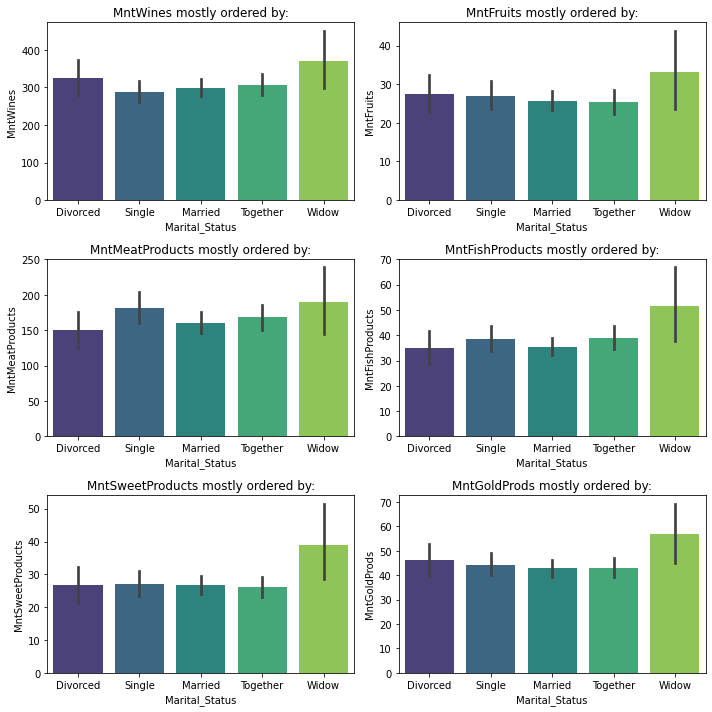

In [142]:
plt.figure(figsize = (10,10))
col = ['MntWines','MntFruits',
       'MntMeatProducts','MntFishProducts','MntSweetProducts',
       'MntGoldProds']

for i,product in enumerate(col):
    ax = plt.subplot(3,2,i+1)
    sns.barplot(x = 'Marital_Status',y = product,
                        data = market_data,palette='viridis',ax = ax)
    plt.title(product+' mostly ordered by:')
    plt.tight_layout()

1) It seems like widows are ordering the most of all the different products. (as shown in the above bar plot, mean as estimator)

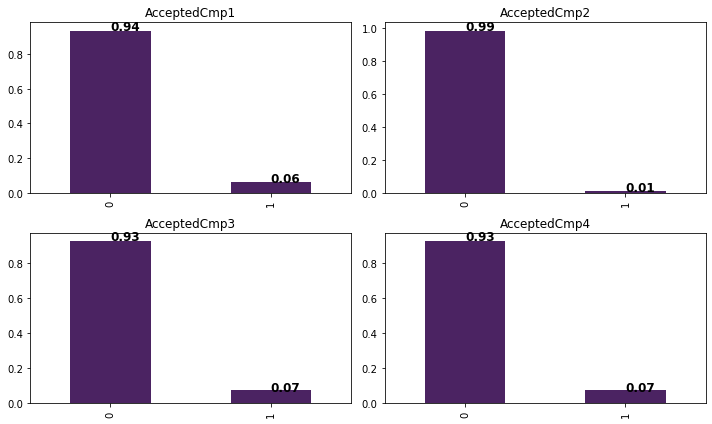

In [179]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],fontsize=12,fontweight = 'bold')
plt.figure(figsize = (10,6))
col = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4']
for i,j in enumerate(col):
    ax = plt.subplot(2,2,i+1)
    mar_data1[j].value_counts(normalize = True).plot.bar(
        ax = ax, colormap = 'flare_r')
    x = mar_data1[j].unique()
    y = (round(mar_data1[j].value_counts(normalize = True),2)).values.tolist()
    addlabels(x , y)
    plt.title(j)
    plt.tight_layout()

1) The outcome of the 2nd campaign looks realy bad comapre to others.

AcceptedCmp1
************
Basic              NaN
Graduation    0.071878
Master        0.056940
PhD           0.063025
Name: Education, dtype: float64


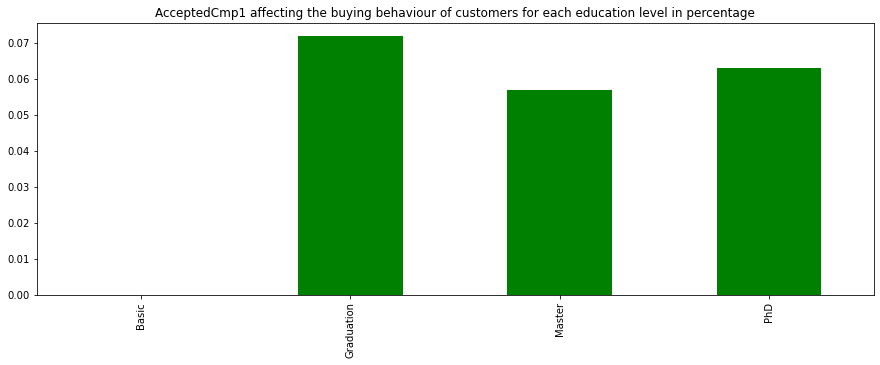

AcceptedCmp2
************
Basic              NaN
Graduation    0.014376
Master        0.007117
PhD           0.021008
Name: Education, dtype: float64


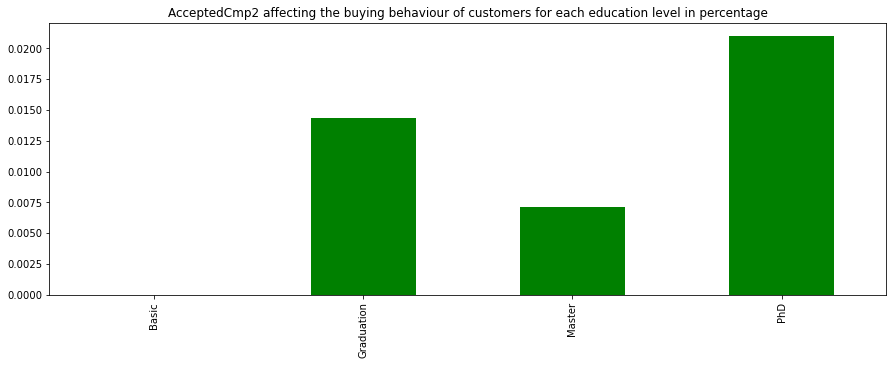

AcceptedCmp3
************
Basic         0.111111
Graduation    0.070081
Master        0.069395
PhD           0.084034
Name: Education, dtype: float64


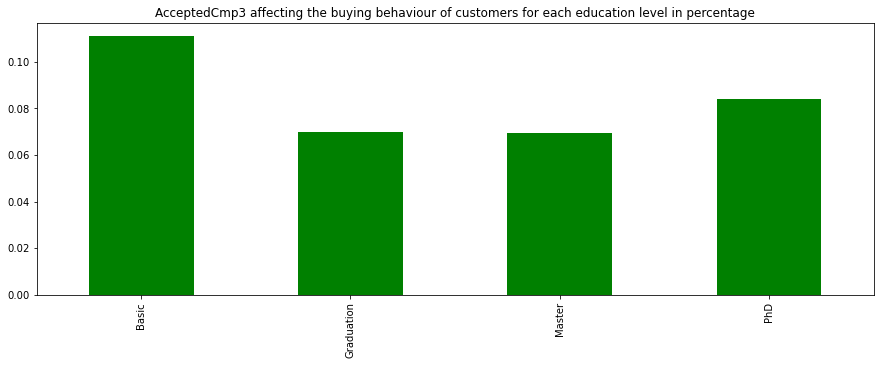

AcceptedCmp4
************
Basic              NaN
Graduation    0.070979
Master        0.071174
PhD           0.094538
Name: Education, dtype: float64


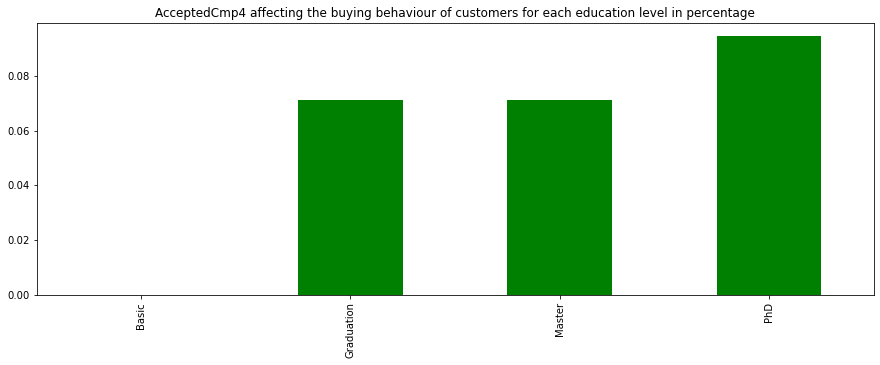

In [147]:
def Campaign(var,text,color_ = 'lightblue'):
    """ var = variable you want to check the relation with
              different marketing campaign
        text = text to print as title
        color_ = color of the plot
    """
    col = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4']
    for i in col:
        print(i)
        print('*'*len(i))
        dc = mar_data1[mar_data1[i] == 1]
        print(dc[var].value_counts() / mar_data1[var].value_counts())
        plt.figure(figsize = (15,5))
        (dc[var].value_counts() / mar_data1[var].value_counts()).plot.bar(color = color_)
        plt.title(i+' affecting the buying behaviour of customers for each {} in percentage'.format(text))
        plt.show()

Campaign(var = 'Education',text = 'education level',color_ = 'green')

1) Well we can see that 1st marketing campaign attracted more graduates, the 2nd & 4th one more phd holders, and the 3rd one the entire basic education group.

AcceptedCmp1
************
18-30    0.094118
30-40    0.056995
40-50    0.042254
50-60    0.074946
60-75    0.087452
Name: age_grp, dtype: float64


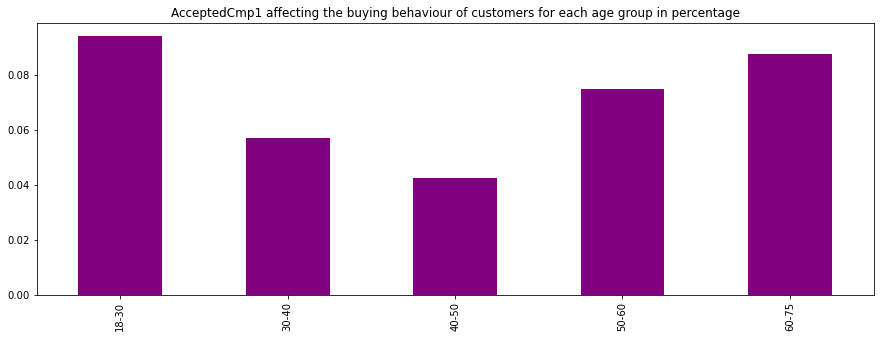

AcceptedCmp2
************
18-30    0.011765
30-40    0.008636
40-50    0.015649
50-60    0.023555
60-75    0.003802
Name: age_grp, dtype: float64


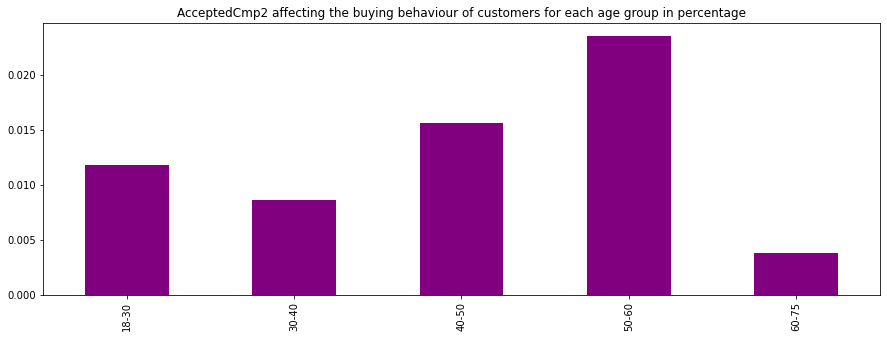

AcceptedCmp3
************
18-30    0.109804
30-40    0.081174
40-50    0.073552
50-60    0.055675
60-75    0.053232
Name: age_grp, dtype: float64


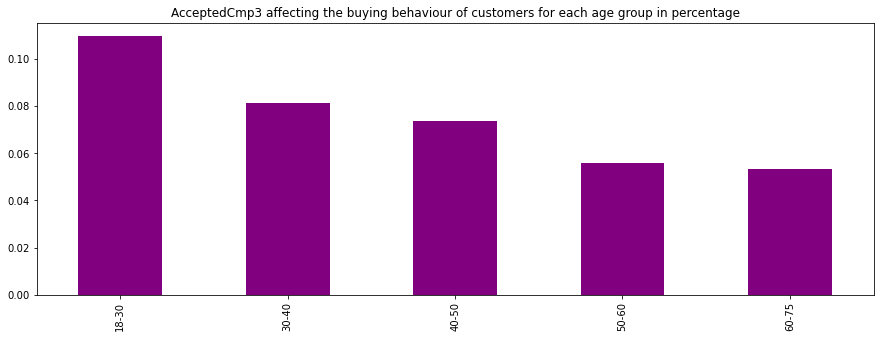

AcceptedCmp4
************
18-30    0.039216
30-40    0.055268
40-50    0.082942
50-60    0.094218
60-75    0.095057
Name: age_grp, dtype: float64


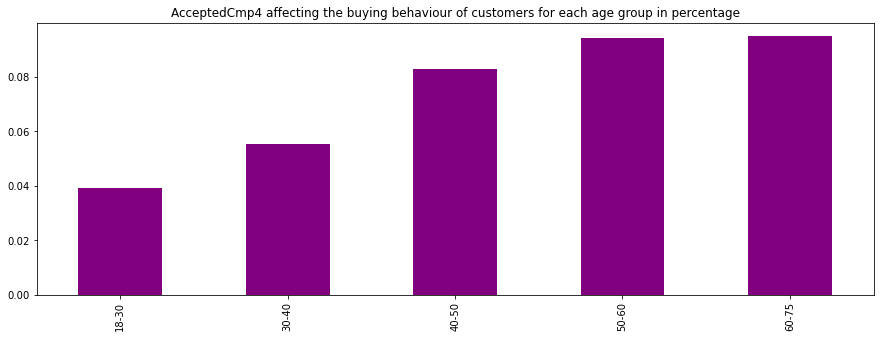

In [148]:
Campaign(var = 'age_grp',text = 'age group',color_ = 'purple')

1) Here we can see that the 1st campaign attracted people of age group 18-30 & 60-75 more.<br>
2) The 2nd campaign more between 50-60.<br>
3) The 3rd campaign again more youngsters of age group 18-30.<br>
4) And the 4th campaign attracted more older generation people of age groups of 50-60 and 60-75.<br>

AcceptedCmp1
************
Married     0.072600
Together    0.056338
Single      0.064990
Divorced    0.052174
Widow       0.065789
Name: Marital_Status, dtype: float64


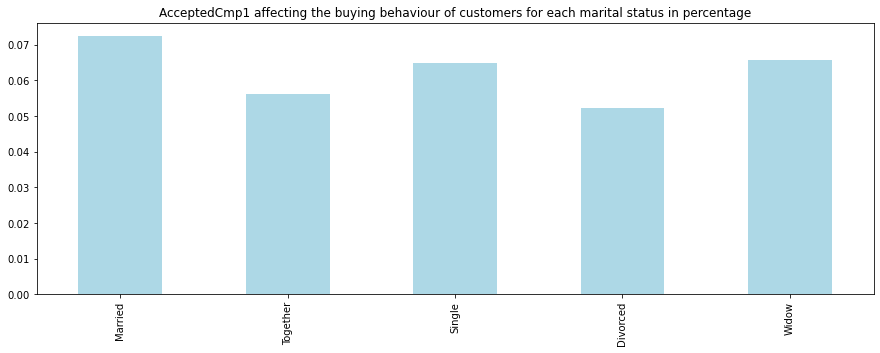

AcceptedCmp2
************
Divorced    0.021739
Married     0.008197
Single      0.010482
Together    0.021127
Widow       0.013158
Name: Marital_Status, dtype: float64


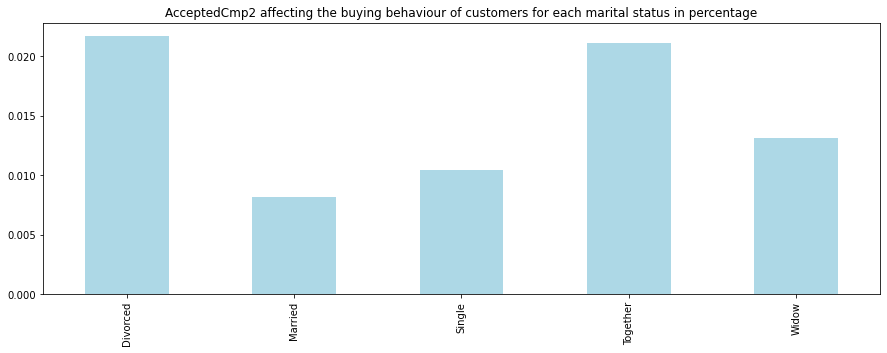

AcceptedCmp3
************
Divorced    0.086957
Married     0.073770
Single      0.081761
Together    0.065141
Widow       0.052632
Name: Marital_Status, dtype: float64


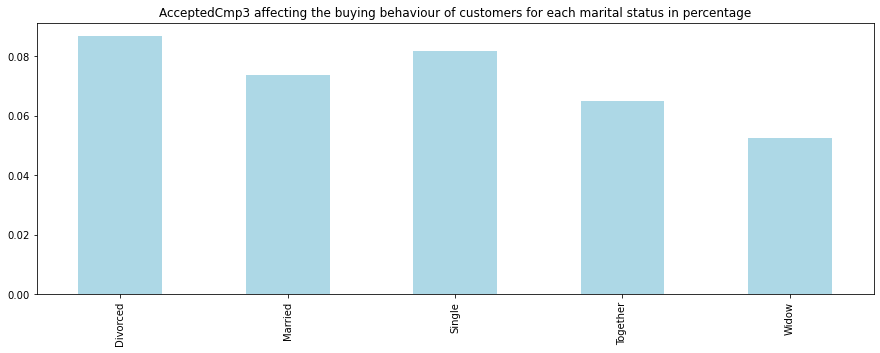

AcceptedCmp4
************
Married     0.072600
Together    0.073944
Single      0.067086
Divorced    0.078261
Widow       0.131579
Name: Marital_Status, dtype: float64


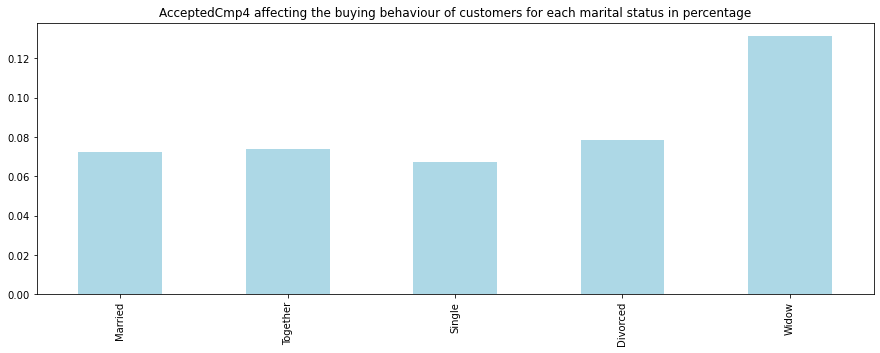

In [180]:
Campaign(var = 'Marital_Status',text = 'marital status')

1) The first campaign attracted more married people.<br>
2) The second and third campaigns attracted more divorcees.<br>
3) And the 4th one attracted more widows.<br>

Total_child
***********


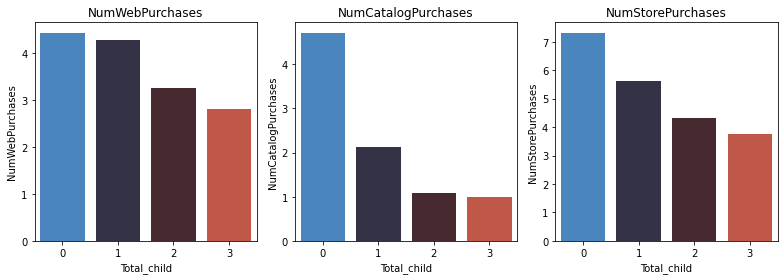

Marital_Status
**************


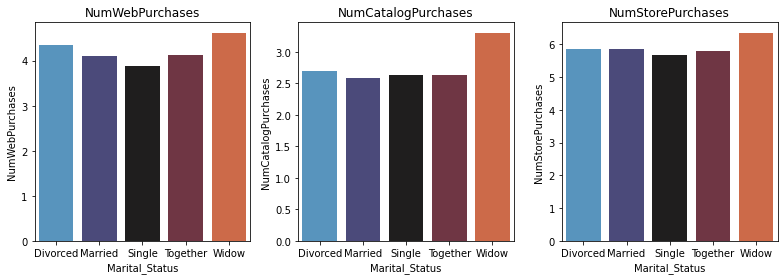

Education
*********


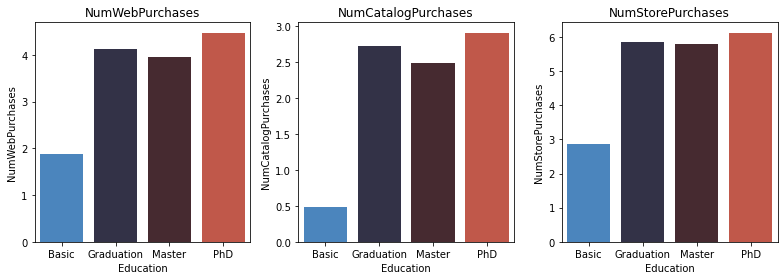

In [182]:
col_ = ['Total_child','Marital_Status','Education']
for k in col_:
    purchase = mar_data1.groupby(by = k, as_index = False)[['NumWebPurchases',
    'NumCatalogPurchases','NumStorePurchases']].mean()
    col = purchase.columns[1:]
    print(k)
    print('*'*len(k))
    plt.figure(figsize = (11,4))
    for j,i in enumerate(col):
        ax = plt.subplot(1,3,j+1)
        sns.barplot(x = k, y = i, data = purchase,ax = ax ,palette='icefire')
        plt.title(i)
        plt.tight_layout()
    plt.show()

1) It looks like people generaly like in store purchases more, followed by web purchases. ( I think it might have reveresed due to the pandemic)<br>